In [1]:
import pandas as pd
import numpy as np
from plotnine import *

%matplotlib inline

In [2]:
data = pd.read_csv("../../data/processed/expensas_full_processed_lag_3.csv",
                  dtype = {
                                "expensa_id": "object",
                                "unidad_id": "object",
                                "consorcio_id": "object",
                                "expensa_mes":"object",
                            },
                  parse_dates = ["expensa_fecha", "expensa_mes_pago", "expensa_mes_pago_anterior"])

In [3]:
X_columns  = [ 'consorcio_cantidad_expensas', 'consorcio_prop_impagos',
               'consorcio_prop_efectivo',
               'unidad_tipo', 'unidad_prop_impagos', 
               'expensa_proporcion',
               'expensa_interes_primer_vencimiento',
               'expensa_ineteres_segundo_vencimiento', 'expensa_mes',
               'pago_metodo_lag_1', 'pago_metodo_lag_2', 'pago_metodo_lag_3']

In [4]:
data = data.sort_values("expensa_mes_pago").reset_index().drop(columns="index")

In [5]:
min_test_id = round(len(data)*0.8)

In [6]:
data.loc[min_test_id,"expensa_mes_pago"]

Timestamp('2018-09-01 00:00:00')

In [7]:
min_cv_id = round(len(data)*.8*0.8)

In [8]:
data.loc[min_cv_id, "expensa_mes_pago"]

Timestamp('2018-06-01 00:00:00')

In [9]:
min_cv_id = data.loc[data.expensa_mes_pago == "2018-06-01", "expensa_mes_pago"].idxmin()

In [10]:
min_test_id = data.loc[data.expensa_mes_pago == "2018-09-01", "expensa_mes_pago"].idxmin()

In [11]:
def get_train_test_split(X_columns):
    X_train = pd.get_dummies(data.loc[0:min_test_id, X_columns])
    X_test = pd.get_dummies(data.loc[min_test_id:, X_columns])
    Y_train = data.loc[0:min_test_id, "target"]
    Y_test = data.loc[min_test_id:, "target"]
    
    drop_test_columns = [column for column in X_test.columns if column not in X_train.columns]
    X_test = X_test.drop(columns=drop_test_columns)

    for column in [column for column in X_train.columns if column not in X_test.columns]:
        X_test[column] = 0
    
    X_test = X_test[X_train.columns]
    print(X_train.shape, Y_train.shape)
    print(X_test.shape, Y_train.shape)
    return X_train, Y_train, X_test, Y_test

In [12]:
X_columns

['consorcio_cantidad_expensas',
 'consorcio_prop_impagos',
 'consorcio_prop_efectivo',
 'unidad_tipo',
 'unidad_prop_impagos',
 'expensa_proporcion',
 'expensa_interes_primer_vencimiento',
 'expensa_ineteres_segundo_vencimiento',
 'expensa_mes',
 'pago_metodo_lag_1',
 'pago_metodo_lag_2',
 'pago_metodo_lag_3']

In [13]:
 X_train, Y_train, X_test, Y_test = get_train_test_split(X_columns)

(146322, 40) (146322,)
(46729, 40) (146322,)


## Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

search_spaces = {
    "penalty": Categorical(["l1","l2","elasticnet"]),
    "C": Real(1e-6, 1e+6, prior="log-uniform"),
    "solver": Categorical(["lbfgs","liblinear"]),
    "max_iter": Integer(100,2000)   
}

logistic_reg = BayesSearchCV(
    estimator = LogisticRegression(),
    search_spaces = search_spaces,
    n_iter = 100,
    scoring = 'f1',
    n_jobs = -1,
    cv = [(list(range(0,min_cv_id)), list(range(min_cv_id,min_test_id)))],
    return_train_score = True,
    error_score = 0,
    random_state = 42,
    verbose = 5
)

In [50]:
logistic_reg.fit(X_train.values, Y_train.values)

Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.2s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.3s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    9.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.3s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.7s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.7s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.7s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.7s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.8s finished
C:\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.7s finished
C:\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.7s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.7s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.7s finished
C:\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.1s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.4s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.3s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.4s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.7s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.4s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.4s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.2s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.7s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.4s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.1s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.2s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.3s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.2s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.2s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.3s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.7s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.2s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.3s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.7s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.7s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.4s finished
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


BayesSearchCV(cv=[([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, ...8, 146309, 146310, 146311, 146312, 146313, 146314, 146315, 146316, 146317, 146318, 146319, 146320])],
       error_score=0,
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_iter=100, n_jobs=-1, n_points=1,
       optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=42,
       refit=True, return_train_score=True, scoring='f1',
       search_spaces={'penalty': Categorical(categories=('l1', 'l2', 'elasticn

In [51]:
logistic_reg.best_params_

{'C': 1000000.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [52]:
logistic_reg.best_score_

0.7360414866032844

In [27]:
logReg = LogisticRegression(
    C = 1000000,
    solver = "lbfgs",
    penalty = "l2",
    max_iter = 100,
)
logReg.fit(X_train, Y_train) 

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def get_train_test_meassures(model, X_train, Y_train, X_test, Y_test):
    train_preds = model.predict(X_train)
    print("accuracy:", accuracy_score(Y_train, train_preds))
    print("precision:", precision_score(Y_train, train_preds))
    print("recall:", recall_score(Y_train, train_preds))
    print("f1:", f1_score(Y_train, train_preds))
    print("--------------------------------------------------")
    test_preds = model.predict(X_test)
    print("accuracy:", accuracy_score(Y_test, test_preds))
    print("precision:", precision_score(Y_test, test_preds))
    print("recall:", recall_score(Y_test, test_preds))
    print("f1:", f1_score(Y_test, test_preds))

In [173]:
get_train_test_meassures(logReg, X_train, Y_train, X_test, Y_test)

accuracy: 0.8766145897404355
precision: 0.804930820474862
recall: 0.7162326476846692
f1: 0.7579957641886278
--------------------------------------------------
accuracy: 0.8765862740482355
precision: 0.7712526118992632
recall: 0.6554205607476635
f1: 0.7086343656848382


In [1]:
def get_logReg_coef(model, columns):
    lm_coef = pd.DataFrame({
        "variable": columns,
        "coef": model.coef_[0]
    })

    lm_coef["abs_coef"] = abs(lm_coef.coef)

    from pandas.api.types import CategoricalDtype
    lm_coef = lm_coef.sort_values("abs_coef", ascending = False)
    lm_coef = lm_coef.reset_index().drop(columns="index")

    variable_cat = CategoricalDtype(categories=lm_coef.variable, ordered=True)
    lm_coef.variable = lm_coef.variable.astype(variable_cat)

    figure_size = (16, 4.8)
    return (ggplot(data=lm_coef)
    + geom_bar(aes(x = "variable",y="coef"), stat = "identity", fill = "#5DADE2")
    + theme(
        axis_text_x = element_text(angle = 45, hjust = 1),
        figure_size = (16, 4.5),
        panel_background = element_rect(fill = "white"),
        panel_grid = element_line(color="grey", linetype="dashed", size=0.5))
    )

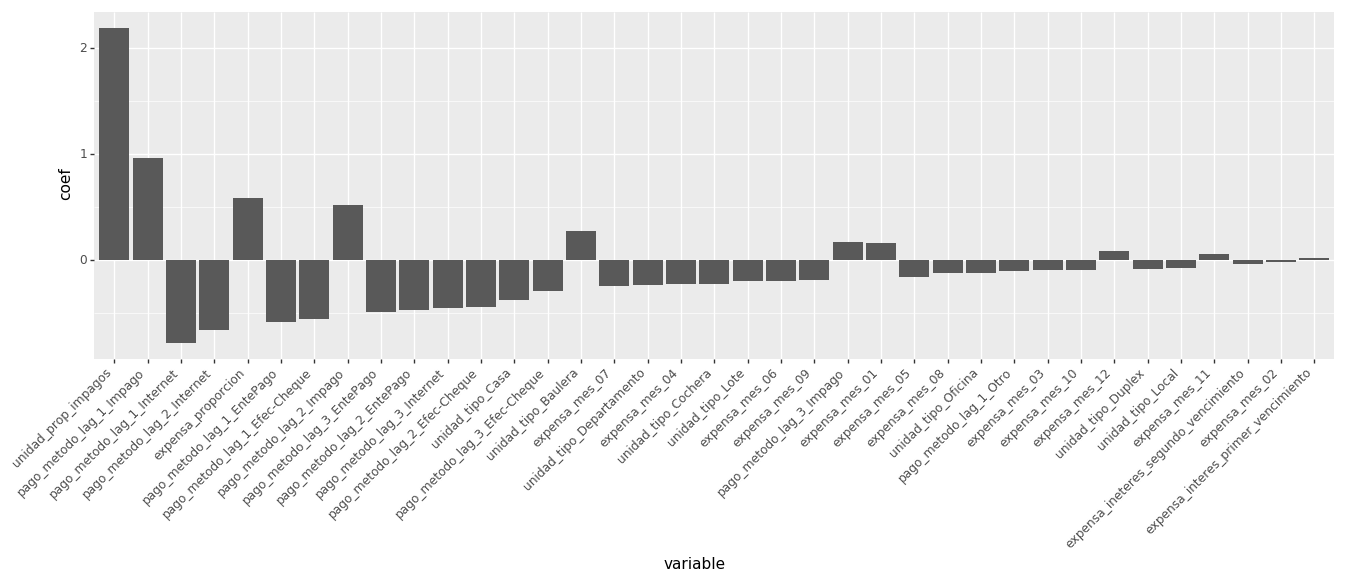

<ggplot: (-9223371897571724733)>

In [94]:
get_logReg_coef(logistic_reg.best_estimator_, X_train.columns)

In [87]:
X_columns2 = ['unidad_prop_impagos',
 'expensa_proporcion',
 'expensa_interes_primer_vencimiento',
 'expensa_ineteres_segundo_vencimiento',
 'unidad_tipo_Casa',
 'unidad_tipo_Departamento',
 'unidad_tipo_Duplex',
 'unidad_tipo_Lote',
 'unidad_tipo_Oficina',
 'expensa_mes_03',
 'expensa_mes_05',
 'expensa_mes_07',
 'expensa_mes_08',
 'expensa_mes_11',
 'expensa_mes_12',
 'pago_metodo_lag_1_Impago',
 'pago_metodo_lag_1_Internet',
 'pago_metodo_lag_1_Otro',
 'pago_metodo_lag_2_EntePago',
 'pago_metodo_lag_2_Internet',
 'pago_metodo_lag_3_EntePago',
 'pago_metodo_lag_3_Internet']

In [88]:
logReg2 = LogisticRegression(
    C = 1000000,
    solver = "lbfgs",
    penalty = "l2",
    max_iter = 100,
)

In [89]:
logReg2.fit(X_train[X_columns2], Y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [90]:
get_train_test_meassures(logReg2,
                         X_train = X_train[X_columns2],
                         Y_train = Y_train,
                         X_test = X_test[X_columns2],
                         Y_test = Y_test)

accuracy: 0.876327551564358
precision: 0.8089773975374299
recall: 0.7090130712331543
f1: 0.7557037557037556
--------------------------------------------------
accuracy: 0.8719852768088339
precision: 0.7652349898808185
recall: 0.6360747663551402
f1: 0.6947024599367153


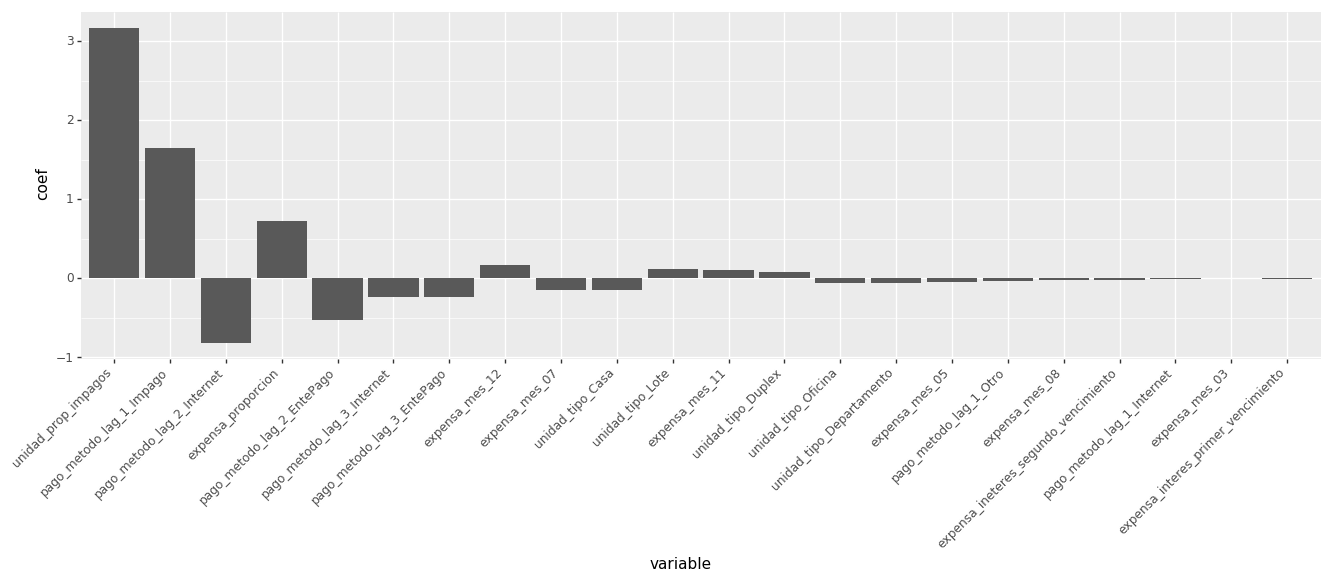

<ggplot: (-9223371897571690194)>

In [95]:
get_logReg_coef(logReg2, X_columns2)

### SVC

In [105]:
from sklearn.svm import SVC

search_spaces = {
    "kernel": Categorical(["poly","rbf"]),
    "C": Real(1e-6, 1e+7, prior="log-uniform"),
    "gamma": Real(1e-6, 1e+7, prior="log-uniform"),
    "max_iter": Integer(1,2000)   
}

svc = BayesSearchCV(
    estimator = SVC(),
    search_spaces = search_spaces,
    n_iter = 100,
    scoring = 'f1',
    n_jobs = -1,
    cv = [(list(range(0,min_cv_id)), list(range(min_cv_id,min_test_id)))],
    return_train_score = True,
    error_score = 0,
    random_state = 42,
    verbose = 5
)

In [97]:
svc.fit(X_train.values, Y_train.values)

Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   40.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   36.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   12.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   27.7s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.7s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.4s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   12.1s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.8min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.2s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   58.8s finished
C:\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   47.2s finished
C:\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   59.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   58.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.1min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   57.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.1min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   58.2s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.1min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.1min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   56.4s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   49.3s finished
C:\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   39.5s finished
C:\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.1min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   59.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   56.1s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   60.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.2min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   59.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.1s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   52.1s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   52.3s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   53.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   52.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.1min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   51.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   51.1s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   52.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   52.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   52.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   50.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   50.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   54.7s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   54.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   33.8s finished
C:\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   46.1s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   45.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   51.7s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   42.8s finished
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1714).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


BayesSearchCV(cv=[([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, ...8, 146309, 146310, 146311, 146312, 146313, 146314, 146315, 146316, 146317, 146318, 146319, 146320])],
       error_score=0,
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_iter=100, n_jobs=-1, n_points=1,
       optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=42,
       refit=True, return_train_score=True, scoring='f1',
       search_spaces={'kernel': Categorical(categories=('poly', 'rbf'), prior=None), 'C': Real(low=1e-06, 

In [161]:
get_train_test_meassures(svc,
                         X_train = X_train,
                         Y_train = Y_train,
                         X_test = X_test,
                         Y_test = Y_test)

NotFittedError: This BayesSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [106]:
svc2 = BayesSearchCV(
    estimator = SVC(),
    search_spaces = search_spaces,
    n_iter = 30,
    scoring = 'f1',
    n_jobs = -1,
    cv = [(list(range(0,min_cv_id)), list(range(min_cv_id,min_test_id)))],
    return_train_score = True,
    error_score = 0,
    random_state = 42,
    verbose = 5
)
svc2.fit(X_train[X_columns2].values, Y_train.values)

Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   28.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   27.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   17.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.3s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   22.2s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   30.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   30.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   24.2s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   37.4s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   42.7s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   10.4s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   42.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   38.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   22.9s finished
C:\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   42.4s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   31.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    9.7s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   34.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   40.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   29.4s finished
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1483).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


BayesSearchCV(cv=[([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, ...8, 146309, 146310, 146311, 146312, 146313, 146314, 146315, 146316, 146317, 146318, 146319, 146320])],
       error_score=0,
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_iter=30, n_jobs=-1, n_points=1,
       optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=42,
       refit=True, return_train_score=True, scoring='f1',
       search_spaces={'kernel': Categorical(categories=('poly', 'rbf'), prior=None), 'C': Real(low=1e-06, h

In [108]:
svc2.best_params_

{'C': 1e-06, 'gamma': 1e-06, 'kernel': 'rbf', 'max_iter': 1483}

In [109]:
get_train_test_meassures(svc2,
                         X_train = X_train[X_columns2],
                         Y_train = Y_train,
                         X_test = X_test[X_columns2],
                         Y_test = Y_test)

accuracy: 0.7512130780060414
precision: 0.5239088150626313
recall: 0.8528979633194853
f1: 0.6490972710885764
--------------------------------------------------
accuracy: 0.780650131609921
precision: 0.5138410433070866
recall: 0.7806542056074767
f1: 0.619750704852352


### LDA

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

param_grid = {
    "solver": ["svd", "lsqr", "eigen"],
    "shrinkage": [None, "auto"]
}

lda = GridSearchCV(
    estimator = LinearDiscriminantAnalysis(),
    param_grid = param_grid,
    scoring = 'f1',
    n_jobs = -1,
    cv = [(list(range(0,min_cv_id)), list(range(min_cv_id,min_test_id)))],
    return_train_score = True,
    error_score = 0,
    verbose = 5
)

In [29]:
lda.fit(X_train.values, Y_train.values)

Fitting 1 folds for each of 6 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    3.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    4.5s finished
C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


GridSearchCV(cv=[([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, ...8, 146309, 146310, 146311, 146312, 146313, 146314, 146315, 146316, 146317, 146318, 146319, 146320])],
       error_score=0,
       estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'solver': ['svd', 'lsqr', 'eigen'], 'shrinkage': [None, 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=5)

In [170]:
get_train_test_meassures(lda, X_train, Y_train, X_test, Y_test)

accuracy: 0.8756099561241645
precision: 0.7905388796329172
recall: 0.7332049853075286
f1: 0.7607932815518669
--------------------------------------------------
accuracy: 0.8753878747672751
precision: 0.7601621679291583
recall: 0.6658878504672897
f1: 0.7099088327604244


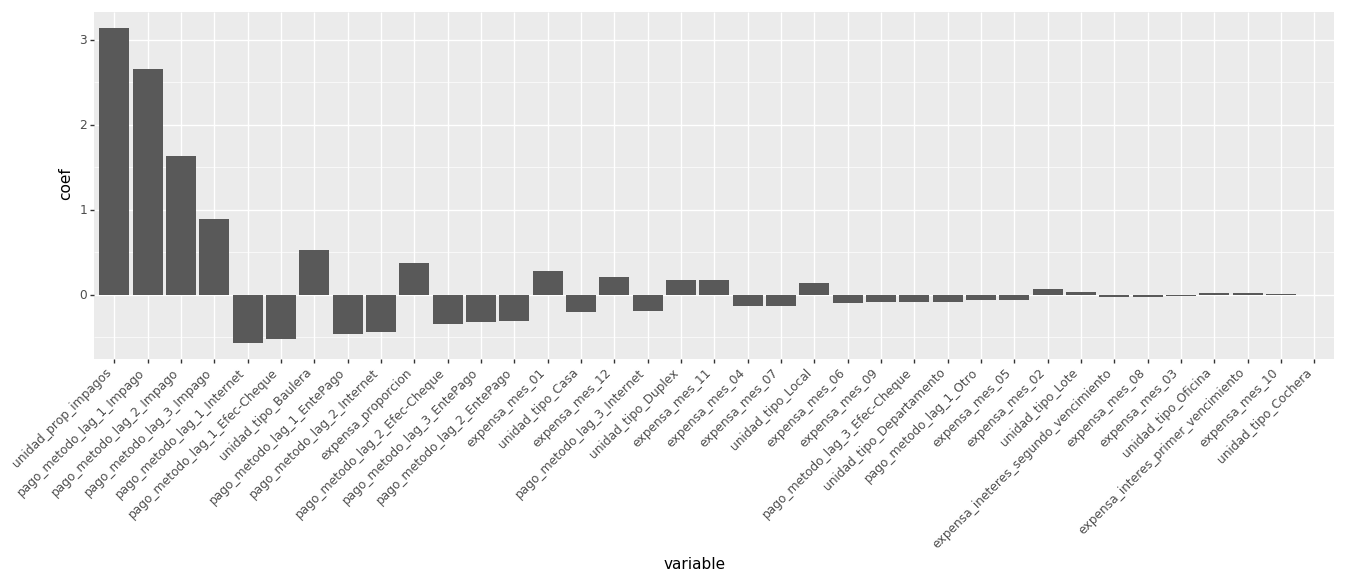

<ggplot: (-9223371897572113769)>

In [122]:
get_logReg_coef(lda.best_estimator_, X_train.columns)

In [125]:
lda2 = GridSearchCV(
    estimator = LinearDiscriminantAnalysis(),
    param_grid = param_grid,
    scoring = 'f1',
    n_jobs = -1,
    cv = [(list(range(0,min_cv_id)), list(range(min_cv_id,min_test_id)))],
    return_train_score = True,
    error_score = 0,
    verbose = 5
)
lda2.fit(X_train[X_columns2].values, Y_train.values)

Fitting 1 folds for each of 6 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    2.1s finished


GridSearchCV(cv=[([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, ...8, 146309, 146310, 146311, 146312, 146313, 146314, 146315, 146316, 146317, 146318, 146319, 146320])],
       error_score=0,
       estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'solver': ['svd', 'lsqr', 'eigen'], 'shrinkage': [None, 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=5)

In [126]:
get_train_test_meassures(lda2, X_train[X_columns2], Y_train, X_test[X_columns2], Y_test)

accuracy: 0.8741747652437775
precision: 0.78490086288512
recall: 0.7350542101530043
f1: 0.7591601805219438
--------------------------------------------------
accuracy: 0.869374478375313
precision: 0.7389270118527761
recall: 0.6642056074766355
f1: 0.6995767299931096


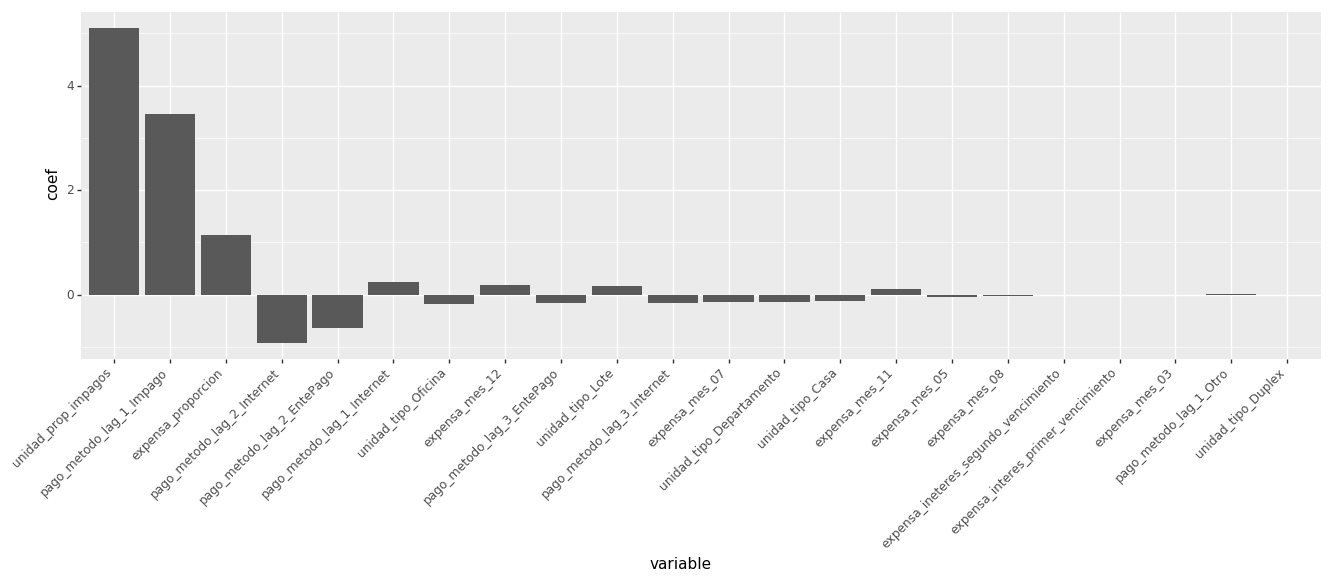

<ggplot: (139183989512)>

In [127]:
get_logReg_coef(lda2.best_estimator_, X_columns2)

In [2]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

search_spaces = {
    "max_depth":Integer(2,10),
    "learning_rate": Real(1e-5, 1e-1, prior="log-uniform"),
    "n_estimators": Integer(5,2000),
    "reg_alpha": Real(1e-5, 9e-1, prior="log-uniform"),
}

xgb = BayesSearchCV(
    estimator = XGBClassifier(),
    search_spaces = search_spaces,
    n_iter = 50,
    scoring = 'f1',
    n_jobs = -1,
    cv = [(list(range(0,min_cv_id)), list(range(min_cv_id,min_test_id)))],
    return_train_score = True,
    error_score = 0,
    random_state = 42,
    verbose = 5,
    refit = True
)

NameError: name 'Integer' is not defined

In [133]:
xgb.fit(X_train.values, Y_train.values)

Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  7.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   53.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  4.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  5.5min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  6.4min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   19.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.2s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.6min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished
C:\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.1s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.2s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.4min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   53.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.1s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.3s finished
C:\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.1s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.4min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.7min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.4min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.3min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.1s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.6min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.1min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.3min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  4.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.3min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.3s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.4min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.2s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.5min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.6min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.2min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.4min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.7min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.2s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.1min finished


BayesSearchCV(cv=[([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, ...8, 146309, 146310, 146311, 146312, 146313, 146314, 146315, 146316, 146317, 146318, 146319, 146320])],
       error_score=0,
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_iter=50, n_jobs=-1, n_points=1,
       optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=42,
       refit=

In [134]:
xgb.best_params_|

{'learning_rate': 0.0026674284564537237,
 'max_depth': 2,
 'n_estimators': 1667,
 'reg_alpha': 0.9}

In [42]:
xgb = XGBClassifier( 
    learning_rate = 0.0026674284564537237,
    max_depth = 2,
    n_estimators = 1667,
    reg_alpha = 0.9)

In [44]:
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.0026674284564537237,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
       n_estimators=1667, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0.9,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [155]:
get_train_test_meassures(xgb, X_train, Y_train, X_test, Y_test)

accuracy: 0.8776602288104318
precision: 0.8208369271034709
recall: 0.6991336508258182
f1: 0.755112929041437
--------------------------------------------------
accuracy: 0.8751738748956751
precision: 0.7898749255509232
recall: 0.6197196261682243
f1: 0.6945273631840796


In [157]:
xgb2 = XGBClassifier( 
    learning_rate = 0.0026674284564537237,
    max_depth = 2,
    n_estimators = 1667,
    reg_alpha = 0.9)
xgb2.fit(X_train[X_columns2], Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.0026674284564537237,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
       n_estimators=1667, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0.9,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [158]:
get_train_test_meassures(xgb2, X_train[X_columns2], Y_train, X_test[X_columns2], Y_test)

accuracy: 0.8770109757931138
precision: 0.8264636148094109
recall: 0.6887475934745162
f1: 0.7513471688727996
--------------------------------------------------
accuracy: 0.8736758757944745
precision: 0.7990275526742301
recall: 0.5989719626168224
f1: 0.6846856471342342


In [163]:
X_train.columns

Index(['unidad_prop_impagos', 'expensa_proporcion',
       'expensa_interes_primer_vencimiento',
       'expensa_ineteres_segundo_vencimiento', 'unidad_tipo_Baulera',
       'unidad_tipo_Casa', 'unidad_tipo_Cochera', 'unidad_tipo_Departamento',
       'unidad_tipo_Duplex', 'unidad_tipo_Local', 'unidad_tipo_Lote',
       'unidad_tipo_Oficina', 'expensa_mes_01', 'expensa_mes_02',
       'expensa_mes_03', 'expensa_mes_04', 'expensa_mes_05', 'expensa_mes_06',
       'expensa_mes_07', 'expensa_mes_08', 'expensa_mes_09', 'expensa_mes_10',
       'expensa_mes_11', 'expensa_mes_12', 'pago_metodo_lag_1_Efec-Cheque',
       'pago_metodo_lag_1_EntePago', 'pago_metodo_lag_1_Impago',
       'pago_metodo_lag_1_Internet', 'pago_metodo_lag_1_Otro',
       'pago_metodo_lag_2_Efec-Cheque', 'pago_metodo_lag_2_EntePago',
       'pago_metodo_lag_2_Impago', 'pago_metodo_lag_2_Internet',
       'pago_metodo_lag_3_Efec-Cheque', 'pago_metodo_lag_3_EntePago',
       'pago_metodo_lag_3_Impago', 'pago_metodo_lag_

## Redes Neuronales

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    "hidden_layer_sizes":[(100), (50,50), (50, 10), (10,20,10), (5,50,50,50)]
}

mlpc = GridSearchCV(
    estimator = MLPClassifier(),
    param_grid = param_grid,
    scoring = 'f1',
    n_jobs = -1,
    cv = [(list(range(0,min_cv_id)), list(range(min_cv_id,min_test_id)))],
    return_train_score = True,
    error_score = 0,
    verbose = 5
)

In [18]:
mlpc.fit(X_train.values, Y_train.values)

Fitting 1 folds for each of 5 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  7.0min remaining: 10.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 12.8min finished


GridSearchCV(cv=[([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, ...8, 146309, 146310, 146311, 146312, 146313, 146314, 146315, 146316, 146317, 146318, 146319, 146320])],
       error_score=0,
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes':

In [19]:
mlpc.best_params_

{'hidden_layer_sizes': (10, 20, 10)}

In [22]:
get_train_test_meassures(mlpc, X_train, Y_train, X_test, Y_test)

accuracy: 0.8814190620685884
precision: 0.8091671324762437
recall: 0.7334262191260291
f1: 0.7694372466945719
--------------------------------------------------
accuracy: 0.872477476513514
precision: 0.7558553696708041
recall: 0.6544859813084112
f1: 0.7015276734284999
